### Download data

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

### Load and Observe Data

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


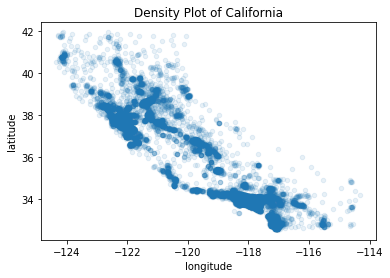

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("Density Plot of California")
plt.show()

### Split Data into Training and Testing

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)

In [17]:
train_set.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Find correlations b/w diff features in the data set, sorted by correlation value

In [42]:
corr_matrix = housing.corr()
corr_matrix["population"].sort_values(ascending=False)

population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64

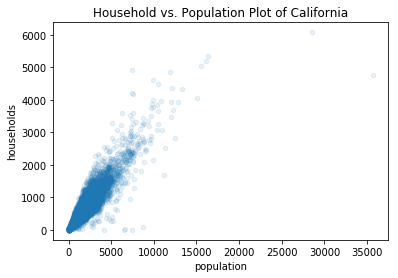

In [43]:
housing.plot(kind="scatter", x="population", y="households", alpha=0.1)
plt.title("Household vs. Population Plot of California")
plt.show()

### Train SVM Regressor
Predict how many house holds at a location based on population (very easy example)

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(epsilon=1.5))
])

np_population = train_set["population"].values.reshape(-1, 1) # reshape turns it from a 1 x n vector to an n x 1 vector
np_households = train_set["households"].values # for some reason this doesn't need to be reshaped?

svm_reg.fit(np_population, np_households)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svr', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

### Plot SVR wrt test set, the line fits pretty well

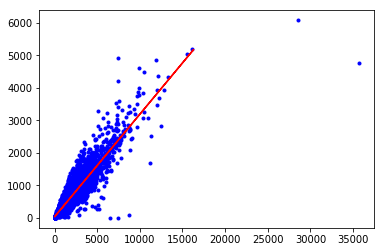

In [81]:
np_population_test = test_set["population"].values.reshape(-1, 1)
household_pred = svm_reg.predict(np_population_test)

import matplotlib.pyplot as plt
plt.plot(np_population, np_households, "b.")
plt.plot(np_population_test, household_pred, "r-")
plt.show()

In [82]:
svm_reg.steps[1][1].coef_, svm_reg.steps[1][1].intercept_

(array([357.83256298]), array([482.98984036]))